In [1]:
## 로이터 데이터세트 로드

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
## 데이터세트 포멧 확인

print(train_data[0])  # 뉴스기사 내용, 문장의 단어들을 단어사전인덱스로 표현
print(train_labels[0])  # 뉴스기사 토픽 인덱스, 0~45 사이

print(train_data.shape)  # 훈련데이터 8982개
print(train_labels.shape)  # 훈련레이블 8982개
print(test_data.shape)  # 테스트데이터 2246개
print(test_labels.shape)  # 테스트레이블 2246개

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
(8982,)
(8982,)
(2246,)
(2246,)


In [3]:
## 뉴스기사 단어사전인덱스 끝값 확인

max([max(sequence) for sequence in train_data])  # 0 ~ 9999 인덱스로 구성됨 (=10000개의 단어사전)

9999

In [4]:
## 실제 뉴스기사 텍스트 확인 (train_data[0] 파싱)

word_index = reuters.get_word_index()  # word_index 는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])  # 정수 인덱스와 단어를 매핑하도록 뒤집음
decoded_newswire = ' '.join( [reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [5]:
## 데이터 세트(정수 시퀀스) 를 이진행렬로 인코딩

import numpy as np

## 정수텐서로 변환 (단어사전 개수에 맞춘 원-핫인코딩)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])
print(x_train.shape)  # (훈련데이터 8982샘플, 10000단어사전패딩)
print(x_test[0])
print(x_test.shape)  # (테스트데이터 2246샘플, 10000단어사전패딩)


## 원-핫인코딩 (토픽 개수에 맞춘 원-핫인코딩)
def to_one_hot(labels, dimension=46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1.
    return result

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_train_labels[0])
print(one_hot_train_labels.shape)  # (훈련레이블 8982샘플, 46레이블패딩)
print(one_hot_test_labels[0])
print(one_hot_test_labels.shape)  # (테스트레이블 2246샘플, 46레이블패딩)

[0. 1. 1. ... 0. 0. 0.]
(8982, 10000)
[0. 1. 1. ... 0. 0. 0.]
(2246, 10000)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(8982, 46)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(2246, 46)


In [6]:
## 모델 정의

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
## 모델 컴파일

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
## 검증 데이터세트 준비

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
print(x_val.shape)  # 검증용 1000개
print(partial_x_train.shape)  # 나머지

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
print(y_val.shape)  # 검증용 1000개
print(partial_y_train.shape)  # 나머지

(1000, 10000)
(7982, 10000)
(1000, 46)
(7982, 46)


In [9]:
## 모델 훈련

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 187us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 134us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.4581 - a

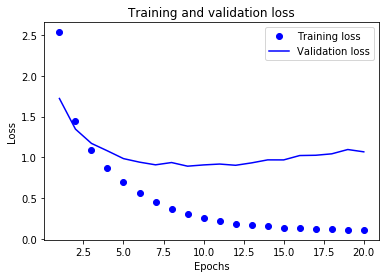

In [10]:
## 훈련손실-검증손실 비교 확인

%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

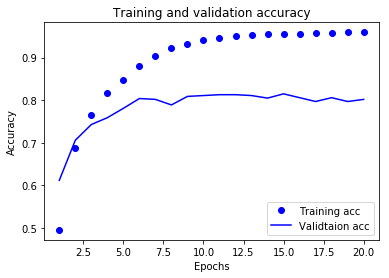

In [11]:
## 훈련정확도-검증정확도 비교 확인

plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validtaion acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
## 모델 재훈련 (과대적합이 발생한 4에포크까지만 훈련 진행)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 205us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 163us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 151us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 140us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 133us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [13]:
## 무작위 분류 테스트

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

print( float(np.sum(hits_array)) / len(test_labels) )

0.182546749777382


In [14]:
## 새로운 데이터에 대해 예측

predictions = model.predict(x_test)
print(predictions)
print(predictions.shape)
print(predictions[0])
print(predictions[0].shape)
print(np.sum(predictions[0]))  # 46개 확률분포의 총합 = 1
print(np.argmax(predictions[0]))  # 46개 확률분포 최대값 = 가장 높은확률값 = 가장 가까운 레이블

[[1.07355781e-05 8.40100402e-05 2.69189350e-05 ... 3.40000770e-05
  6.67288123e-06 9.81391713e-06]
 [7.00830366e-04 1.51221221e-02 3.05126328e-03 ... 5.80868626e-04
  1.22253095e-05 2.64901464e-04]
 [1.74110790e-03 7.65848279e-01 2.75393436e-03 ... 1.53494926e-04
  2.03400012e-03 2.30254678e-04]
 ...
 [1.12960379e-05 2.15941574e-04 4.13794041e-05 ... 8.91800664e-06
  1.16168565e-04 1.15184803e-05]
 [1.30932825e-03 1.18480578e-01 3.37002357e-03 ... 6.00616913e-04
  7.26833823e-04 3.74740164e-04]
 [8.72341450e-04 5.44265389e-01 1.85975409e-03 ... 5.40284818e-05
  5.04078227e-04 2.05687626e-04]]
(2246, 46)
[1.07355781e-05 8.40100402e-05 2.69189350e-05 9.71323252e-01
 1.65276807e-02 1.26748759e-07 1.02780192e-04 3.16077712e-05
 3.71782924e-03 2.32846810e-06 3.30501243e-05 1.61824678e-03
 5.72378813e-05 2.82239871e-05 5.03423689e-06 1.96415513e-05
 9.31003189e-04 2.06289857e-04 2.99783511e-04 1.26380695e-03
 8.01187649e-04 5.20671718e-04 7.73416923e-06 5.88524599e-05
 1.29573855e-05 3.28555

In [15]:
## 레이블에 따른 손실함수 변경

# y_train_copy = np.array(train_labels)
# y_test_copy = np.array(test_labels)
# model.compile(optimizer='rmsprop',
#              loss='sparse_categorical_crossentropy',
#              metrics=['acc'])

In [16]:
## 정보병목이 있는 모델 테스트 (충분히 큰 중간층을 두어야하는 이유)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=False)

results = model.evaluate(x_test, one_hot_test_labels)
print(results)  # 처음 20에포크 훈련 모델보다 정확도가 더 떨어졌음

2246/2246 [==============================] - 0s 85us/step
[1.4630839501972828, 0.6843276937307254]


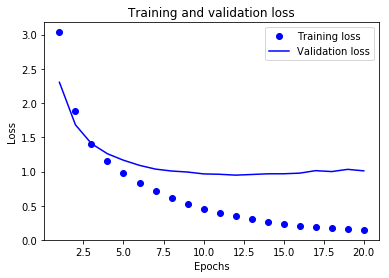

In [17]:
## 추가실험 (32개 유닛 사용)

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=False)
# results = model.evaluate(x_test, one_hot_test_labels)
# print(results)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=False)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

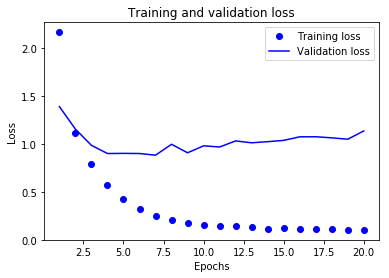

In [18]:
## 추가실험 (128개 유닛 사용)

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=False)
# results = model.evaluate(x_test, one_hot_test_labels)
# print(results)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=False)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

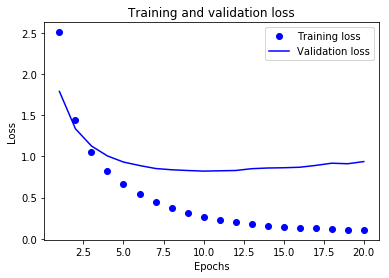

In [19]:
## 추가실험 (1개 은닉층 사용)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=False)
# results = model.evaluate(x_test, one_hot_test_labels)
# print(results)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=False)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

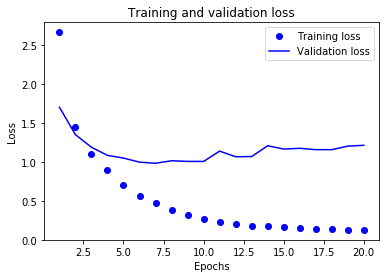

In [20]:
## 추가실험 (3개 은닉층 사용)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=False)
# results = model.evaluate(x_test, one_hot_test_labels)
# print(results)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=False)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()